In [1]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set file paths
cruise_pre_path = "../data/cruise_pre.db"
cruise_post_path = "../data/cruise_post.db"

# 1. Data preview

## 1.1. Pre-trip data

In [3]:
# Preview of cruise_pre
con_pre = sqlite3.connect(cruise_pre_path)
cruise_pre = pd.read_sql_query("SELECT * FROM cruise_pre", con_pre)
print("Data points: {}".format(len(cruise_pre)))
cruise_pre.head()

Data points: 133746


,index,Gender,Date of Birth,Source of Traffic,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,Cabin Comfort,Onboard Entertainment,Cabin service,Baggage handling,Port Check-in Service,Onboard Service,Cleanliness,Ext_Intcode
0,0,None,05/10/1973,Direct - Company Website,A little important,3.0,5.0,3.0,01/01/2023 0:00,Very important,2.0,2.0,A little important,2.0,2.0,4.0,2.0,3.0,LB446RWOOZI
1,1,Female,None,Indirect - Social Media,Not at all important,4.0,1.0,NaN,01/01/2023 0:01,Very important,NaN,4.0,None,2.0,3.0,4.0,4.0,4.0,LB138HKBECM
2,2,Female,22/07/1998,Indirect - Search Engine,None,3.0,0.0,5.0,01/01/2023 0:02,None,NaN,5.0,Extremely important,2.0,1.0,2.0,3.0,NaN,BL713UHBAAN
3,3,Female,01/05/1970,Direct - Company Website,Very important,4.0,4.0,4.0,01/01/2023 0:05,Somewhat important,4.0,4.0,None,NaN,NaN,3.0,2.0,4.0,LB243DMKCFL
4,4,Male,07/01/1960,Direct - Company Website,Somewhat important,4.0,2.0,NaN,01/01/2023 0:06,Not at all important,2.0,NaN,Not at all important,3.0,NaN,5.0,2.0,NaN,LB218CFLOBS


## 1.2. Post-trip data

In [4]:
# Load data
con_post = sqlite3.connect(cruise_post_path)
cruise_post = pd.read_sql_query("SELECT * FROM cruise_post", con_post)

# Preview of cruise_post
print("Data points: {}".format(len(cruise_post)))
cruise_post.head()

Data points: 133746


,index,Cruise Name,Ticket Type,Cruise Distance,Ext_Intcode,WiFi,Dining,Entertainment
0,0,Blastoise,None,3567 KM,LB446RWOOZI,1.0,1,1.0
1,1,Blastoise,Deluxe,672 KM,LB138HKBECM,NaN,0,1.0
2,2,IAPRAS,Deluxe,1167 KM,BL713UHBAAN,NaN,0,0.0
3,3,Lapras,Deluxe,280 KM,LB243DMKCFL,NaN,0,1.0
4,4,Lapras,Standard,1145 Miles,LB218CFLOBS,NaN,1,NaN


## 1.3. Merged data

In [5]:
# Join cruise_pre and cruise_post
cruise = cruise_pre.merge(cruise_post, on=["index", "Ext_Intcode"])
print("Data points: {} \n".format(len(cruise)))
print(cruise.info())
cruise.head()

Data points: 133746 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133746 entries, 0 to 133745
Data columns (total 25 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   index                                       133746 non-null  int64  
 1   Gender                                      120290 non-null  object 
 2   Date of Birth                               119062 non-null  object 
 3   Source of Traffic                           133746 non-null  object 
 4   Onboard Wifi Service                        114254 non-null  object 
 5   Embarkation/Disembarkation time convenient  118103 non-null  float64
 6   Ease of Online booking                      115391 non-null  float64
 7   Gate location                               116606 non-null  float64
 8   Logging                                     133746 non-null  object 
 9   Onboard Dining Service                      1169

,index,Gender,Date of Birth,Source of Traffic,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,...,Port Check-in Service,Onboard Service,Cleanliness,Ext_Intcode,Cruise Name,Ticket Type,Cruise Distance,WiFi,Dining,Entertainment
0,0,None,05/10/1973,Direct - Company Website,A little important,3.0,5.0,3.0,01/01/2023 0:00,Very important,...,4.0,2.0,3.0,LB446RWOOZI,Blastoise,None,3567 KM,1.0,1,1.0
1,1,Female,None,Indirect - Social Media,Not at all important,4.0,1.0,NaN,01/01/2023 0:01,Very important,...,4.0,4.0,4.0,LB138HKBECM,Blastoise,Deluxe,672 KM,NaN,0,1.0
2,2,Female,22/07/1998,Indirect - Search Engine,None,3.0,0.0,5.0,01/01/2023 0:02,None,...,2.0,3.0,NaN,BL713UHBAAN,IAPRAS,Deluxe,1167 KM,NaN,0,0.0
3,3,Female,01/05/1970,Direct - Company Website,Very important,4.0,4.0,4.0,01/01/2023 0:05,Somewhat important,...,3.0,2.0,4.0,LB243DMKCFL,Lapras,Deluxe,280 KM,NaN,0,1.0
4,4,Male,07/01/1960,Direct - Company Website,Somewhat important,4.0,2.0,NaN,01/01/2023 0:06,Not at all important,...,5.0,2.0,NaN,LB218CFLOBS,Lapras,Standard,1145 Miles,NaN,1,NaN


## 1.4. Evaluation 

Both pre-trip data and post-trip data has 133746 data points. The first attempt to join both datasets by *Ext_Intcode* (passenger internal code) resulted in 141538 data points, suggesting that duplicates exist in *Ext_Intcode*. These duplicates will be cleaned up later in section __2.2. Data cleaning: Remove duplicates__.

Since pre-trip and post-trip data has the same number of data points, their *index* could be matching. A second attempt to join both datasets by *index* and *Ext_Intcode* resulted in 133746 data points, indicating that the datasets have been reasonably joined.

# 2. Data cleaning

## 2.1. Rename columns 

Columns will be renamed to keep them succinct.

In [6]:
# Rename columns
cruise = cruise.rename(columns={
    "Gender": "gender", 
    "Date of Birth": "birth_date",
    "Source of Traffic": "source",
    "Onboard Wifi Service": "wifi_impt",
    "Embarkation/Disembarkation time convenient": "schedule_impt",
    "Ease of Online booking": "booking_impt",
    "Gate location": "gate_impt",
    "Logging": "log_time",
    "Onboard Dining Service": "dining_impt",
    "Online Check-in": "online_checkin_impt",
    "Cabin Comfort": "comfort_impt",
    "Onboard Entertainment": "entertain_impt",
    "Cabin service": "cabin_svc_impt",
    "Baggage handling": "baggage_impt",
    "Port Check-in Service": "port_checkin_impt",
    "Onboard Service": "onboard_svc_impt",
    "Cleanliness": "clean_impt",
    "Cruise Name": "cruise",
    "Ticket Type": "ticket",
    "Cruise Distance": "distance",
    "WiFi": "wifi_satisfy",
    "Dining": "dining_satisfy",
    "Entertainment": "entertain_satisfy"
})

## 2.2. Remove duplicates 

As mentioned in section __1.4. Data preview: Evaluation__, there may be duplicated submissions by each passenger. The duplicates should be cleaned up to prevent each passenger from contributing more to the prediction than intended.

* ASSUMPTION: The duplicates in *Ext_Intcode* seem to occur due to multiple submissions by each passenger. Assuming that this occurs due to passengers updating the survey as they change their mind, only the final submission (final customer preference) will be retained.

In [7]:
# Convert logtime to datetime and sort by logtime
cruise["log_time"] = pd.to_datetime(cruise.loc[:,"log_time"], format="%d/%m/%Y %H:%M")
cruise = cruise.sort_values(by=["log_time"], ignore_index=True)

# Check for duplicate users in cruise
cruise_dup = cruise[cruise.duplicated(subset="Ext_Intcode", keep=False)]
print("Duplicated points: {}".format(len(cruise_dup)))

# Clean duplicates (keep final submission)
cruise = cruise.drop_duplicates(subset="Ext_Intcode", keep="last")
print("Remaining points after dropping duplicates: {} \n".format(len(cruise)))

# Drop columns not used for prediction
cruise = cruise.reset_index(drop=True)
cruise = cruise.drop(["index", "Ext_Intcode", "log_time"], axis="columns")
print(cruise.info())

Duplicated points: 7792
Remaining points after dropping duplicates: 129850 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129850 entries, 0 to 129849
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               116781 non-null  object 
 1   birth_date           115565 non-null  object 
 2   source               129850 non-null  object 
 3   wifi_impt            110926 non-null  object 
 4   schedule_impt        114652 non-null  float64
 5   booking_impt         112063 non-null  float64
 6   gate_impt            113209 non-null  float64
 7   dining_impt          113509 non-null  object 
 8   online_checkin_impt  114634 non-null  float64
 9   comfort_impt         113494 non-null  float64
 10  entertain_impt       114403 non-null  object 
 11  cabin_svc_impt       116396 non-null  float64
 12  baggage_impt         113453 non-null  float64
 13  port_checkin_impt    115904 non-null  floa

## 2.3. Feature engineering

__Gender (gender)__

In [8]:
cruise["gender"].unique()

array([None, 'Female', 'Male'], dtype=object)

As this variable consists of nominal categorical data, one-hot encoding will be used to convert it to numerical data since most models require numerical data. The scikit-learn one-hot encoder will introduce a new column ("None") for missing data which will be dropped.

In [9]:
# Assign number to gender
cruise["gender_enc"] = cruise["gender"].astype('category').cat.codes

# Create an instance of One-hot-encoder
enc = OneHotEncoder()
  
# Pass encoded columns
enc_data = pd.DataFrame(enc.fit_transform(
    cruise[["gender_enc"]]).toarray())

# Rename encoded columns
enc_data.columns = ["gender." + str(i) for i in cruise["gender"].unique()]

# Add encoded columns
cruise = cruise.join(enc_data)
cruise = cruise.drop(["gender_enc", "gender.None"], axis="columns")

__Date of Birth (birth_date)__

In [10]:
for i in cruise["birth_date"].unique():
    print(i)

05/10/1973
None
22/07/1998
01/05/1970
07/01/1960
23/12/1986
20/03/1987
20/12/1981
26/07/1980
13/05/2008
19/03/1989
20/08/1989
08/05/2000
08/06/1976
17/07/1987
01/11/1971
21/06/1969
07/08/1975
16/10/1965
01/01/1982
22/02/1984
03/12/1977
05/01/2004
12/12/1964
02/09/1978
19/04/1979
22/07/1981
28/09/1957
12/03/1987
16/03/1998
10/05/1978
15/03/1977
06/11/1994
23/07/1994
05/01/1972
23/09/2009
20/10/2015
24/03/2002
13/07/1985
09/11/1991
02/01/1999
11/01/1970
15/11/1987
21/10/2008
07/09/2009
08/04/1979
17/02/1981
28/08/1992
06/08/1996
09/10/1972
06/08/1962
03/04/1984
11/01/1960
22/11/1993
20/04/2002
07/08/2002
17/05/1983
04/09/2001
25/05/1984
22/06/1983
18/06/1971
23/09/2000
16/08/1974
17/01/1967
12/06/1964
15/06/1975
16/08/1972
28/06/1998
27/06/1961
21/10/2009
03/04/1976
24/02/1959
28/11/2015
06/03/1997
25/04/1998
16/09/1986
13/01/1961
21/07/1963
1897-05-13
07/01/1988
06/07/1993
28/08/1971
1864-10-10
07/02/1980
08/02/1992
06/09/2003
01/10/1975
10/07/1963
28/06/1990
17/03/2015
11/08/1989
13/10

This variable needs to be cleaned up as different formats were found: "%d/%m/%Y", "%Y-%m-%d", "None". Date of birth will also be converted to age of passengers, which is more likely to influence the choice of the passengers' ticket purchase (e.g. older people might have more financial capability and preference to buy expensive tickets).

* ASSUMPTION: age (rather than birthday) influences choice of ticket purchase
* ASSUMPTION: the dataset is collected this year, thus age of passenger is calculated for the year 2023

After converting birthday to age, some age does not make sense (e.g. more than 116 years old, which is older than the oldest human alive in 2023) and should be removed.

* ASSUMPTION: oldest possible age is 116 (oldest human alive)

In [11]:
# Set current year
current_year = 2023

# Create new column for age
cruise["age"] = 0

# Calculate age
for i in cruise.index:
    if str(cruise.loc[i, "birth_date"]) == "None":
        cruise.loc[i, "age"] = np.nan
    elif "/" in str(cruise.loc[i, "birth_date"]):
        age = current_year - int(cruise.loc[i, "birth_date"][-4:])
    elif "-" in str(cruise.loc[i, "birth_date"]):
        age = current_year - int(cruise.loc[i, "birth_date"][:4])
    else:
        print("Check birth_date for index {}.".format(i))
    
    # Update age
    if age > 116:
            cruise.loc[i, "age"] = np.nan
    else:
        cruise.loc[i, "age"] = age
        
# Drop original Date of Birth column
cruise = cruise.drop(["birth_date"], axis="columns")

__Source of Traffic (source)__

In [12]:
cruise["source"].unique()

array(['Direct - Company Website', 'Indirect - Social Media',
       'Indirect - Search Engine', 'Direct - Email Marketing'],
      dtype=object)

This variable will be further split into types of information as both may help in prediction: 
  1. source_type (Direct / Indirect)
  2. source_traffic (CompanyWebsite / SocialMedia / SearchEngine / EmailMarketing)
  
As this variable consists of nominal categorical data, one-hot encoding will be used to convert it to numerical data since most models require numerical data.

In [13]:
# Create new columns for source_type and source_traffic
cruise["source_type"] = "None"

# Split information
for i in cruise.index:
    
    # source_type
    if  "Direct" in str(cruise.loc[i, "source"]):
        cruise.loc[i, "source_type"] = "Direct"
    elif "Indirect" in str(cruise.loc[i, "source"]):
        cruise.loc[i, "source_type"] = "Indirect"
    else:
        print("Check source for index {}.".format(i))
        
    # source_traffic
    if  "Company Website" in str(cruise.loc[i, "source"]):
        cruise.loc[i, "source_traffic"] = "CompanyWebsite"
    elif "Social Media" in str(cruise.loc[i, "source"]):
        cruise.loc[i, "source_traffic"] = "SocialMedia"
    elif "Search Engine" in str(cruise.loc[i, "source"]):
        cruise.loc[i, "source_traffic"] = "SearchEngine"
    elif "Email Marketing" in str(cruise.loc[i, "source"]):
        cruise.loc[i, "source_traffic"] = "EmailMarketing"
    else:
        print("Check source for index {}.".format(i))
    
# Assign number to source
cruise["source_type_enc"] = cruise["source_type"].astype('category').cat.codes
cruise["source_traffic_enc"] = cruise["source_traffic"].astype('category').cat.codes

# Create an instance of One-hot-encoder
enc = OneHotEncoder()
  
# Pass encoded columns
enc_data = pd.DataFrame(enc.fit_transform(
    cruise[["source_type_enc", "source_traffic_enc"]]).toarray())

# Rename encoded columns
enc_data.columns = ["source_type." + str(i) for i in cruise["source_type"].unique()] + \
    ["source_traffic." + str(i) for i in cruise["source_traffic"].unique()]

# Add encoded columns
cruise = cruise.join(enc_data)
cruise = cruise.drop(["source", "source_type_enc", "source_traffic_enc"], axis="columns")

__Onboard Wifi Service (wifi_impt)__ <br>
__Onboard Dining Service (dining_impt)__ <br>
__Onboard Entertainment (entertain_impt)__

In [14]:
cruise["wifi_impt"].unique()

array(['A little important', 'Not at all important', None,
       'Very important', 'Somewhat important', 'Extremely important'],
      dtype=object)

In [15]:
cruise["dining_impt"].unique()

array(['Very important', None, 'Somewhat important',
       'Not at all important', 'A little important',
       'Extremely important'], dtype=object)

In [16]:
cruise["entertain_impt"].unique()

array(['A little important', None, 'Extremely important',
       'Not at all important', 'Very important', 'Somewhat important'],
      dtype=object)

These variables are ordinal categories and should be mapped to the importance scale below:

| No | Scale                |
|----|----------------------|
| 1  | Not at all important |
| 2  | A little important   |
| 3  | Somewhat important   |
| 4  | Very important       |
| 5  | Extremely important  |

In [17]:
# Importance scale
map_dict = {
    None: np.nan,
    "Not at all important": 1,
    "A little important": 2,
    "Somewhat important": 3,
    "Very important": 4,
    "Extremely important":5
}

# Map values
cruise = cruise.replace({
    "wifi_impt": map_dict,
    "dining_impt": map_dict,
    "entertain_impt": map_dict
})

__Cruise Name (cruise)__

In [18]:
cruise["cruise"].unique()

array(['Blastoise', 'IAPRAS', 'Lapras', None, 'blast', 'lap', 'blastoise',
       'blast0ise', 'lapras'], dtype=object)

The cruise names input by each passenger are different and should be standardized 

* ASSUMPTION: Based on Pokemon names, "Blastoise", "blast", "blastoise", "blast0ise" are the same cruise (Blastoise) and "IAPRAS", "Lapras", "lap", "lapras" are the same cruise (Lapras)

As this variable consists of nominal categorical data, one-hot encoding will be used to convert it to numerical data since most models require numerical data. The scikit-learn one-hot encoder will introduce a new column ("None") for missing data which will be dropped.

In [19]:
# Standard cruise name
map_dict = {
    "blast": "Blastoise",
    "blastoise": "Blastoise", 
    "blast0ise": "Blastoise",
    "IAPRAS": "Lapras",
    "lap": "Lapras",
    "lapras": "Lapras"
}

# Map values
cruise = cruise.replace({"cruise": map_dict})

# Assign number to cruise
cruise["cruise_enc"] = cruise["cruise"].astype('category').cat.codes

# Create an instance of One-hot-encoder
enc = OneHotEncoder()
  
# Pass encoded columns
enc_data = pd.DataFrame(enc.fit_transform(
    cruise[["cruise_enc"]]).toarray())

# Rename encoded columns
enc_data.columns = ["cruise." + str(i) for i in cruise["cruise"].unique()]

# Add encoded columns
cruise = cruise.join(enc_data)
cruise = cruise.drop(["cruise_enc", "cruise.None"], axis="columns")

__Ticket Type (ticket)__

In [20]:
cruise["ticket"].unique()

array([None, 'Deluxe', 'Standard', 'Luxury'], dtype=object)

As different tickets have different prices (or prestige), this is considered an ordinal categorical variable. The tickets will be ordered based on the table below.

* ASSUMPTION: price of tickets are ordered based on common tourism terms
* ASSUMPTION: "Standard" is the cheapest, followed by "Deluxe", and "Luxury"

| No. | Ticket   |
|-----|----------|
| 1   | Standard |
| 2   | Deluxe   |
| 3   | Luxury   |

In [21]:
# Price/prestige scale
map_dict = {
    None: np.nan,
    "Standard": 1,
    "Deluxe": 2,
    "Luxury": 3
}

# Map values
cruise = cruise.replace({"ticket": map_dict})

__Cruise Distance (distance)__

In [22]:
for i in cruise["distance"].unique():
    print(i)

3567 KM
672 KM
1167 KM
280 KM
1145 Miles
607 KM
528 KM
None
594 KM
802 KM
2417 KM
236 Miles
134 Miles
270 KM
1056 KM
872 KM
1783 KM
1995 KM
-158 KM
697 KM
342 KM
950 Miles
331 Miles
2689 Miles
2475 KM
479 KM
2450 KM
1072 KM
201 KM
2070 KM
67 KM
893 KM
2355 KM
251 KM
1085 KM
366 KM
115 KM
190 Miles
163 KM
578 KM
150 Miles
250 KM
1249 KM
956 KM
373 KM
3551 Miles
3326 KM
417 KM
2075 KM
3874 KM
175 KM
3107 KM
1652 KM
261 KM
590 KM
432 KM
235 KM
554 KM
937 KM
2762 KM
2491 Miles
-3732 KM
2139 KM
748 KM
1172 KM
900 KM
592 KM
1916 KM
304 KM
954 KM
-1166 KM
321 KM
-3629 KM
130 KM
2218 KM
3179 KM
488 KM
2276 KM
2654 Miles
1035 KM
808 KM
641 KM
268 KM
1127 KM
-937 Miles
541 KM
3113 Miles
1506 KM
-247 KM
391 KM
408 KM
3407 KM
427 KM
549 KM
2986 KM
1084 KM
1237 KM
3267 KM
255 KM
2105 KM
1463 KM
2422 KM
236 KM
125 Miles
170 KM
-3449 KM
763 Miles
-2139 KM
368 KM
728 KM
-1570 KM
719 KM
967 Miles
2418 KM
1076 KM
1000 KM
563 Miles
2208 KM
661 Miles
3369 KM
631 KM
143 KM
2466 KM
1182 KM
668 KM
128 KM
473

This variable needs to be cleaned up as negative numbers were found, and different types of units were also found: "KM", "Miles", "None". They will be standardized to absolute kilometers.

* ASSUMPTION: negative numbers make sense and just represents a different direction of travel

In [23]:
# Create new column for distance
cruise["distance_km"] = 0

# Convert distance to km
for i in cruise.index:
    if str(cruise.loc[i, "distance"]) == "None":
        cruise.loc[i, "distance_km"] = np.nan
    elif "KM" in str(cruise.loc[i, "distance"]):
         cruise.loc[i, "distance_km"] = abs(int(cruise.loc[i, "distance"].split('KM')[0]))
    elif "Miles" in str(cruise.loc[i, "distance"]):
        cruise.loc[i, "distance_km"] = abs(int(cruise.loc[i, "distance"].split('Miles')[0]) * 1.609)
    else:
        print("Check index {} for distance.".format(i))

# Drop original Distance column
cruise = cruise.drop(["distance"], axis="columns")

__Dining (dining_satisfy)__

In [24]:
cruise["dining_satisfy"].unique()

array([1, 0], dtype=int64)

In [25]:
cruise["dining_satisfy"].describe()

count    129850.000000
mean          0.499345
std           0.500001
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: dining_satisfy, dtype: float64

It is unusual that there are no NaN entries for this variable. NaN may have been converted to 0 when this column is converted to int64 (cannot take NaN values). NaN values should be introduced if necessary.

* ASSUMPTION: if all other cruise_post entries are missing, then assume user passenger did not do the post-trip survey and NaN will be introduced.

In [26]:
# Convert Dining to float
cruise["dining_satisfy"] = cruise["dining_satisfy"].astype("float64")

# Assume Dining to be missing if other cruise_post entries are missing
for i in cruise.index:
    if (cruise.loc[i, "cruise.Blastoise"] == 0)\
    and (cruise.loc[i, "cruise.Lapras"] == 0)\
    and np.isnan(cruise.loc[i, "ticket"])\
    and np.isnan(cruise.loc[i, "distance_km"])\
    and np.isnan(cruise.loc[i, "wifi_satisfy"])\
    and np.isnan(cruise.loc[i, "entertain_satisfy"]):
        cruise.loc[i, "dining_satisfy"] = np.nan

__Embarkation/Disembarkation time convenient (schedule_impt)__<br>
__Ease of Online booking (booking_impt)__<br>
__Gate location (gate_impt)__<br>
__Online Check-in (online_checkin_impt)__<br>
__Cabin Comfort (comfort_impt)__<br>
__Cabin Service (cabin_svc_impt)__<br>
__Baggage Handling (baggage_impt)__<br>
__Port Check-in Service (port_checkin_impt)__<br>
__Onboard Service (onboard_svc_impt)__<br>
__Cleanliness (clean_impt)__<br>
__WiFi (wifi_satisfy)__<br>
__Entertainment (entertain_satisfy)__<br>

In [27]:
float_col = cruise[["schedule_impt", "booking_impt", "gate_impt",
                    "online_checkin_impt", "comfort_impt", "cabin_svc_impt",
                    "baggage_impt", "port_checkin_impt", "onboard_svc_impt",
                    "clean_impt", "wifi_satisfy", "entertain_satisfy"]]
float_col.describe()

,schedule_impt,booking_impt,gate_impt,online_checkin_impt,comfort_impt,cabin_svc_impt,baggage_impt,port_checkin_impt,onboard_svc_impt,clean_impt,wifi_satisfy,entertain_satisfy
count,114652.000000,112063.000000,113209.000000,114634.000000,113494.000000,116396.000000,113453.000000,115904.000000,112099.000000,115344.000000,62139.000000,71549.000000
mean,3.055830,2.757369,2.978756,3.249935,3.439574,3.383209,3.633416,3.307064,3.641299,3.285745,0.500587,0.502621
std,1.526339,1.402469,1.278190,1.350470,1.321604,1.287788,1.178899,1.266700,1.178621,1.313328,0.500004,0.499997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000,1.000000
75%,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000


As the range of importance scale provided for these variables (except *wifi_satisfy* and *entertain_satisfy*) fall within [1, 5], the zeroes found in these variables could be errors. They will be converted to NaNs.

In [28]:
# Get columns to clean
float_col = float_col.drop(["wifi_satisfy", "entertain_satisfy"], axis="columns")

# Convert zeroes to NaN
map_dict = {0: np.nan}
for col in float_col.columns:
    cruise = cruise.replace({col: map_dict})

# 3. Data exploration

In [29]:
# Split numerical, categorical (ordinal) and categorical (nominal)
cruise_num = cruise[["age", "distance_km"]]
cruise_cat_ord = cruise[["wifi_impt", "schedule_impt", "booking_impt",
                         "gate_impt", "dining_impt", "online_checkin_impt",
                         "comfort_impt", "entertain_impt", "cabin_svc_impt",
                         "baggage_impt", "port_checkin_impt", "onboard_svc_impt",
                         "clean_impt", "ticket", "wifi_satisfy", "dining_satisfy",
                         "entertain_satisfy"]]
cruise_cat_nom = cruise[["gender", "source_type","source_traffic", "cruise"]]
cruise_cat_nom_enc = cruise[["gender.Female", "gender.Male", 
                             "source_type.Direct", "source_type.Indirect",
                             "source_traffic.CompanyWebsite", "source_traffic.SocialMedia",
                             "source_traffic.SearchEngine", "source_traffic.EmailMarketing",
                             "cruise.Blastoise", "cruise.Lapras"]]

## 3.1. Univariate analysis

### 3.1.1 Numerical

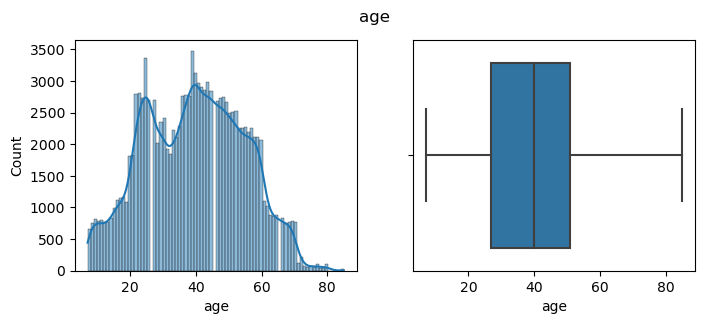

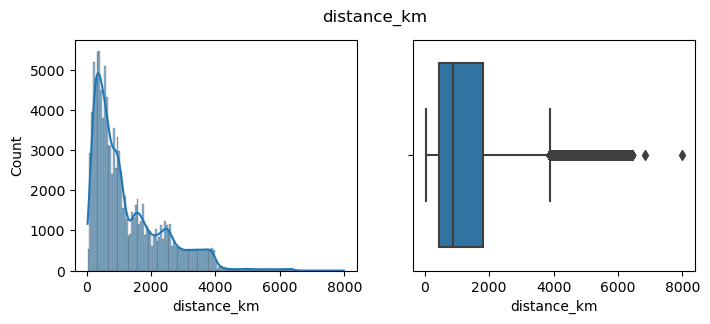

In [30]:
for col in cruise_num:
    
    # Plot histogram
    plt.figure(figsize=(8,3))
    plt.subplot(1, 2, 1)
    sns.histplot(data=cruise_num, x=col, kde=True)
    
    # Plot boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data = cruise_num, x=col)
    plt.suptitle(col)
    plt.show()

Since *age* has a bimodal distribution and *distance_km* is right-skewed, log transformation has been applied so that these variables will become more normally distributed. 

There are some outliers in *distance_km* (> 4000 km). However, these are not removed as it is uncertain whether these are erroneous data or natural variations. It is possible for a cruise to travel for many days and very long distances if it refuels.

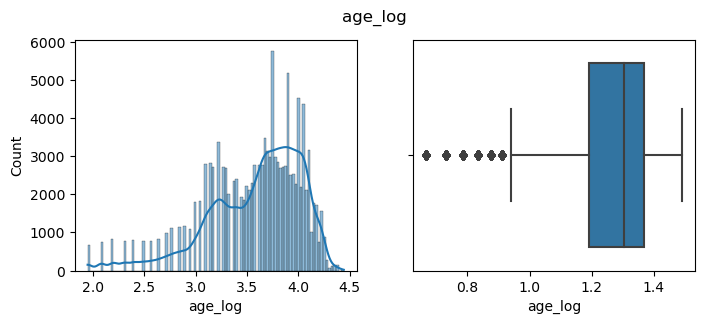

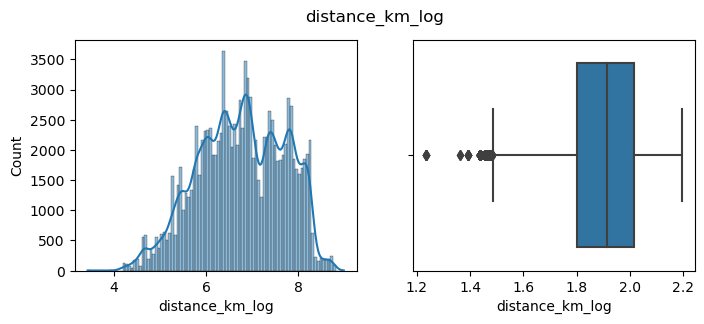

In [31]:
# Log transformation
cruise["age_log"] = np.log(cruise["age"])
cruise["distance_km_log"] = np.log(cruise["distance_km"])
cruise = cruise.drop(["age", "distance_km"], axis="columns")
cruise_num = cruise[["age_log", "distance_km_log"]]

for col in cruise_num:
    
    # Plot histogram
    plt.figure(figsize=(8,3))
    plt.subplot(1, 2, 1)
    sns.histplot(data=cruise_num, x=col, kde=True)
    
    # Plot boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data = pd.DataFrame(np.log(cruise_num[col])), x=col)
    plt.suptitle(col)
    plt.show()

From the second set of plots, log transformation has indeed cause the variables to become more normally distributed.

### 3.1.2 Categorical (ordinal)

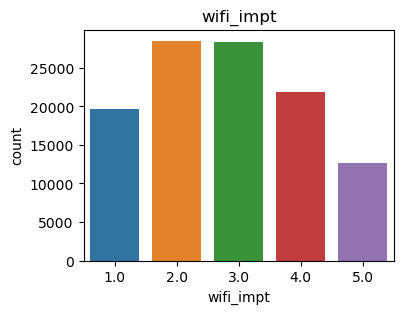

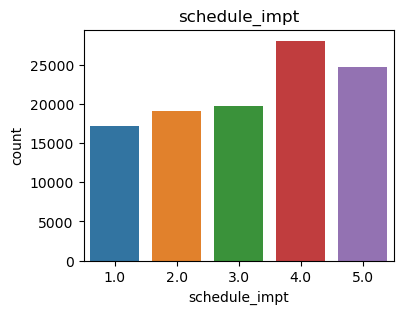

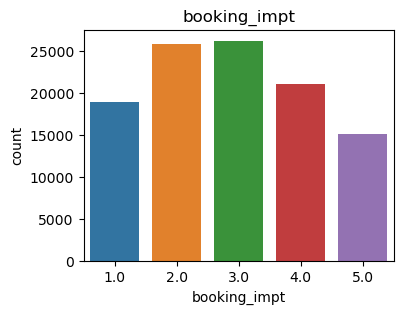

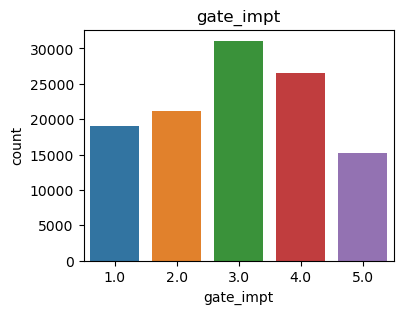

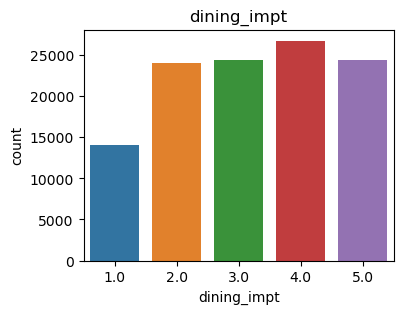

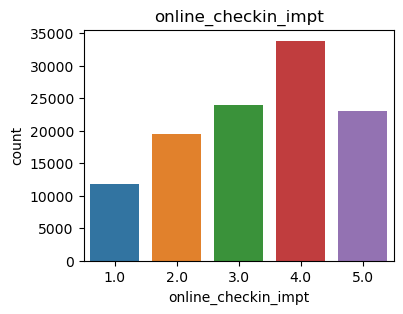

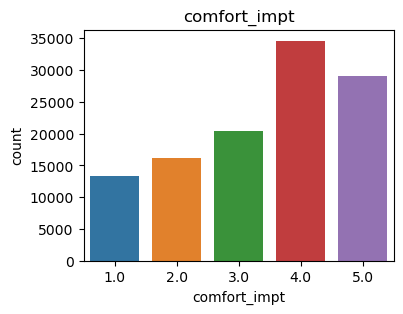

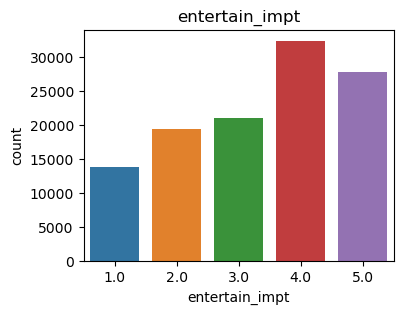

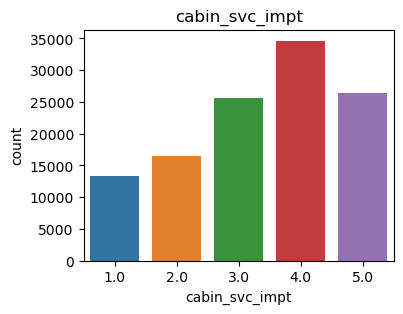

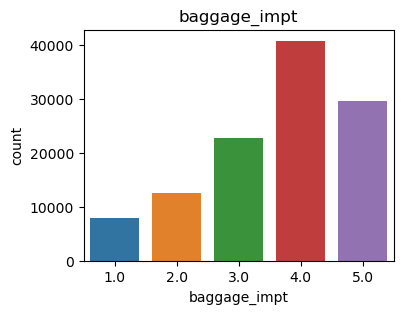

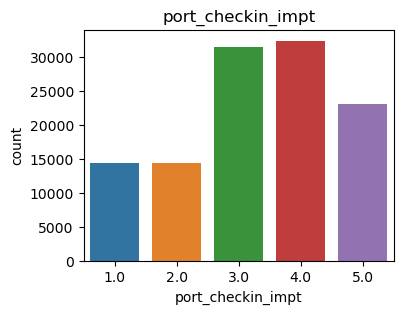

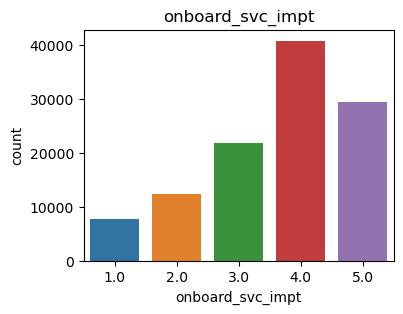

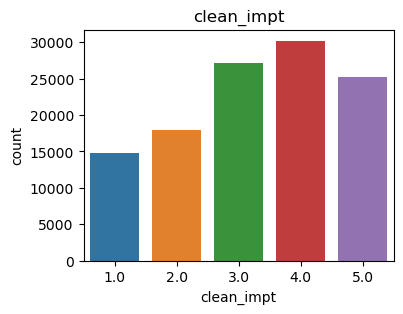

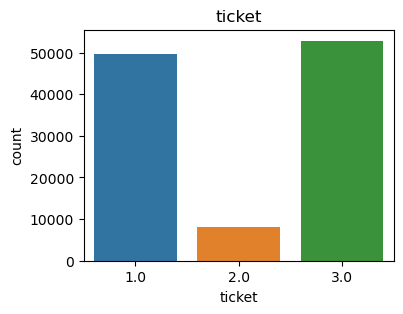

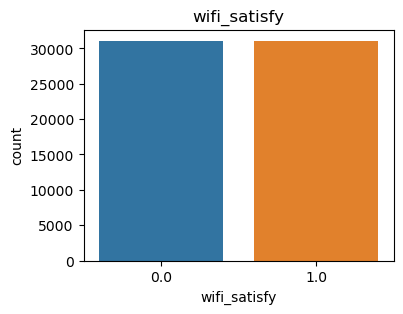

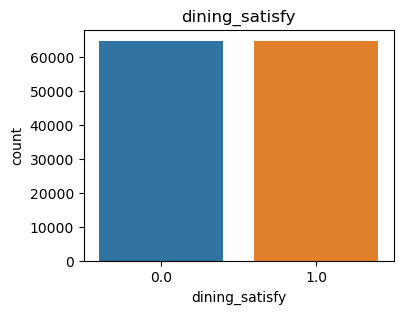

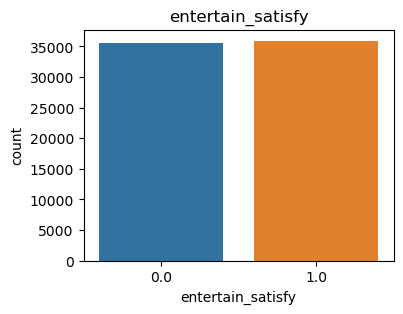

In [32]:
for col in cruise_cat_ord:
    
    # Plot distribution
    plt.figure(figsize=(4,3))
    plot = sns.countplot(data=cruise_cat_ord, x=col)
    plt.title(col)
    plt.show()

Overall, passengers seem to value these variables more:

* Embarkation/Disembarkation time convenience (*schedule_impt*)
* Onboard Dining Service (*dining_impt*)
* Online Check-in (*online_checkin_impt*)
* Cabin Comfort (*comfort_impt*)
* Onboard Entertainment (*entertain_impt*)
* Cabin Service (*cabin_svc_impt*)
* Baggage Handling (*baggage_impt*)
* Port Check-in Service (*port_checkin_impt)
* Onboard Service (*onboard_svc_impt*)
* Cleanliness (*clean_impt*)

On the other hand, passengers seem to value these variables less:

* Onboard Wifi Service (*wifi_impt*)
* Ease of Online Booking (*booking_impt*)
* Gate location (gate_impt)

Most passengers purchased Standard (*ticket = 1.0*) and Luxury (*ticket = 3.0*) tickets. Deluxe (*ticket = 2.0*) tickets are less in-demand).

There are mixed feelings on satisfcation level of wifi, (*wifi_satisfy*), dining (*dining_satisfy*), and entertainment (*entertain_satisfy*).

### 3.1.2 Categorical (nominal)

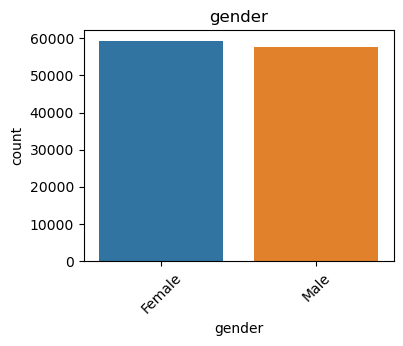

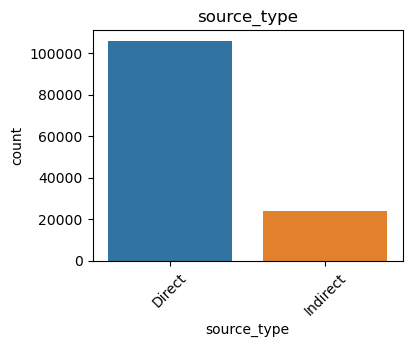

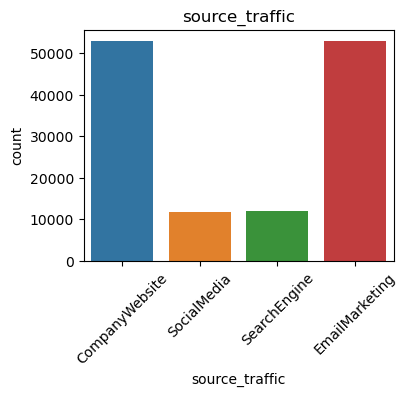

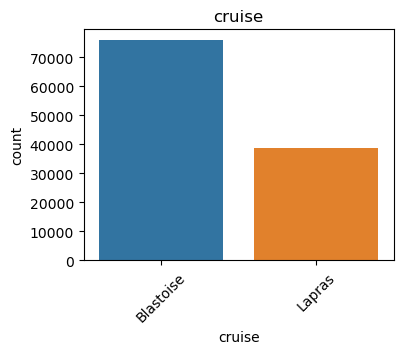

In [33]:
for col in cruise_cat_nom:
    
    # Plot distribution
    plt.figure(figsize=(4,3))
    data_plot = sns.countplot(data=cruise_cat_nom, x=col)
    data_plot.set_xticklabels(data_plot.get_xticklabels(), rotation=45)
    plt.title(col)
    plt.show()

* There are about equal number of male and female passengers.
* Most pasengers heard about or booked the cruise through direct channels (Company Website / Email Marketing) instead of indirect channels (Social Media / Search Engine).
* Blastoise cruise is more popular than Lapras cruise.

## 3.2. Bivariate analysis

### 3.2.1 Numerical

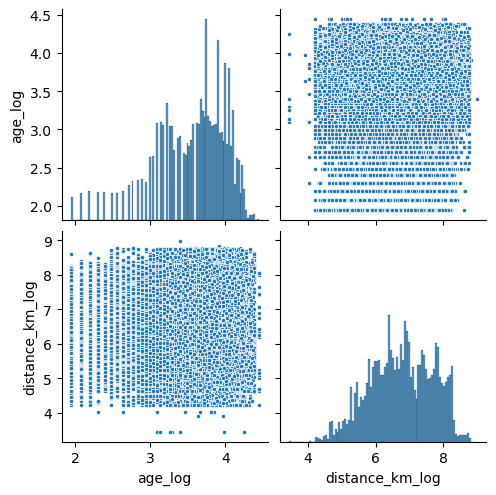

In [34]:
# Plot pairplot
sns.pairplot(data=cruise_num, plot_kws=dict(marker="."))
plt.show()

From the plots, age of passenger and distance of cruise do not seem to be correlated.

### 3.2.2 Categorical (ordinal) vs. categorical (nominal)

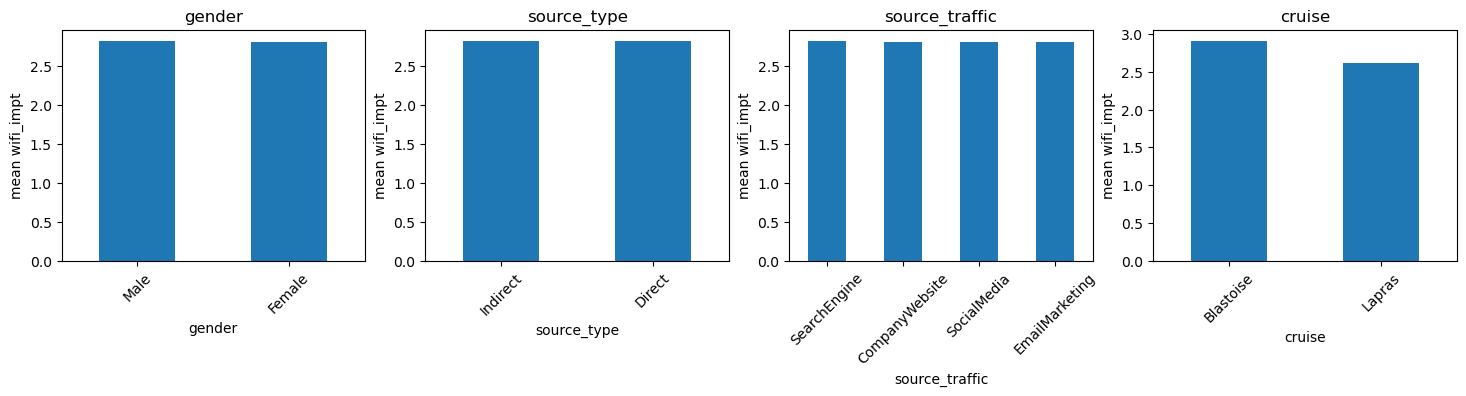

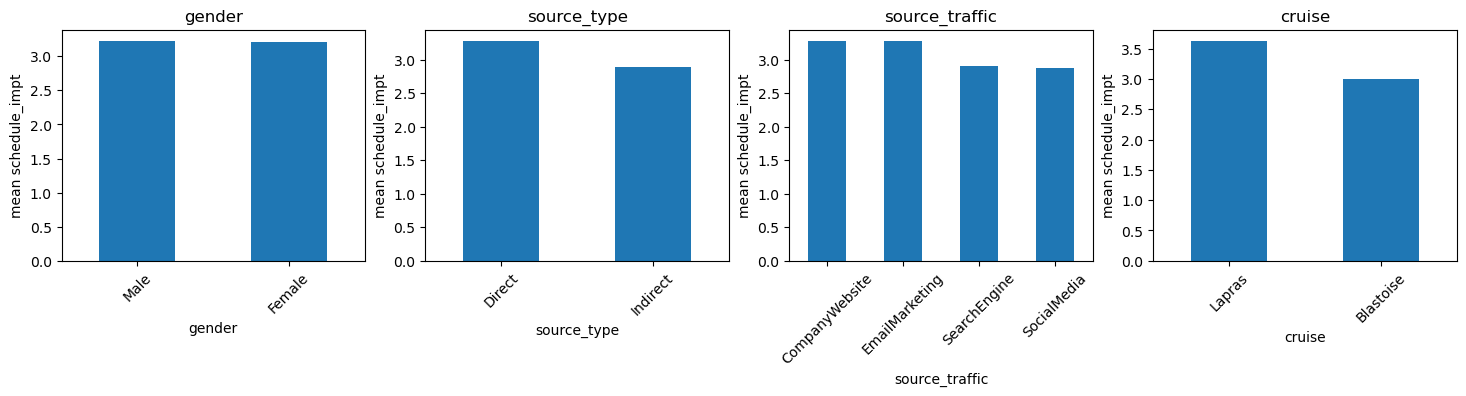

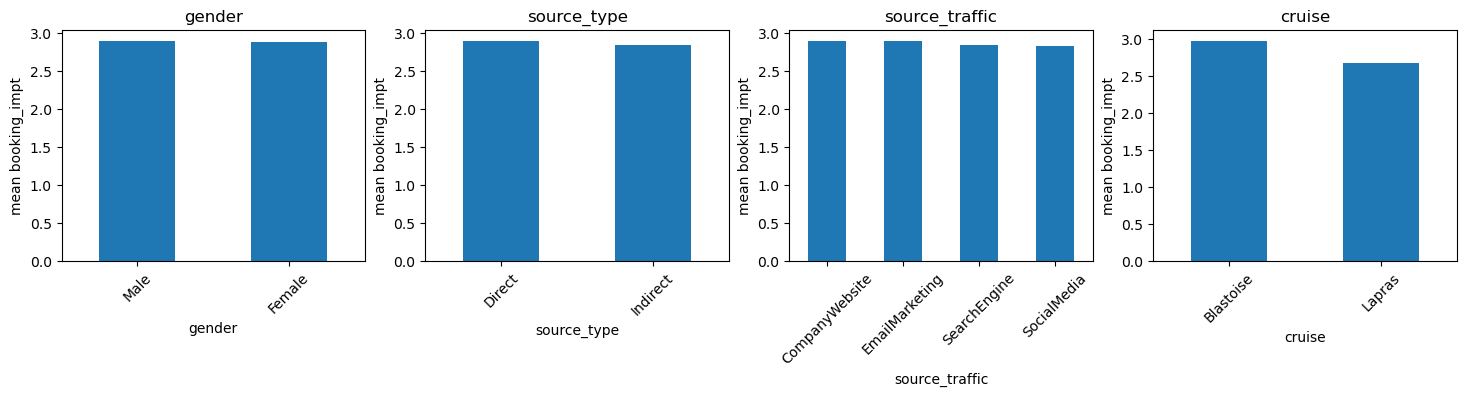

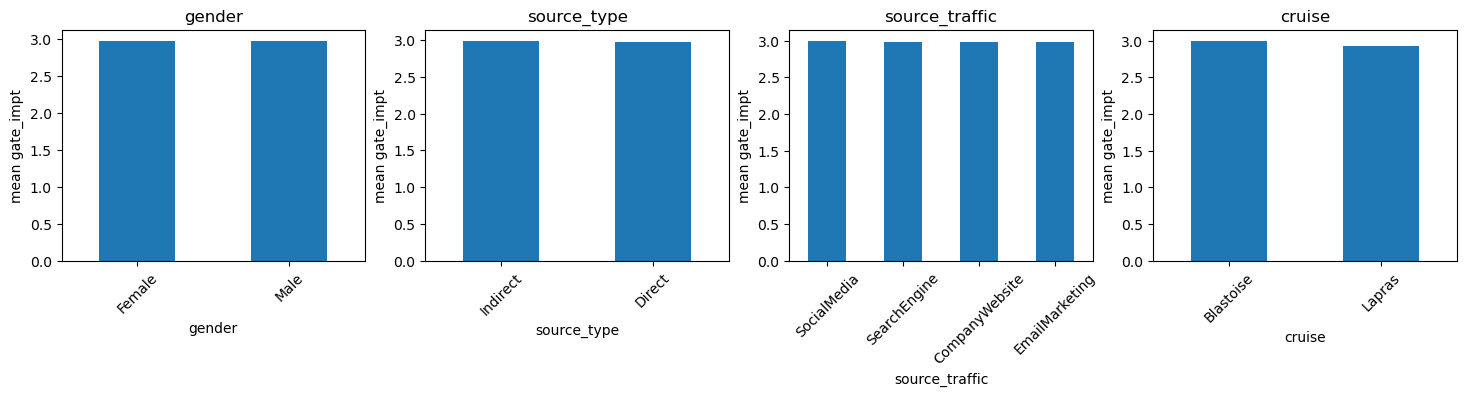

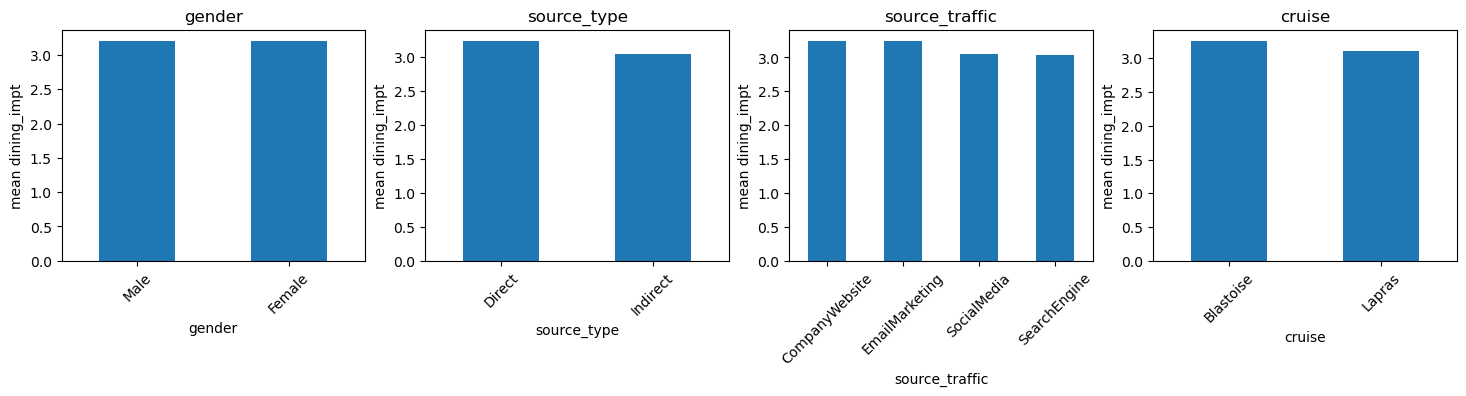

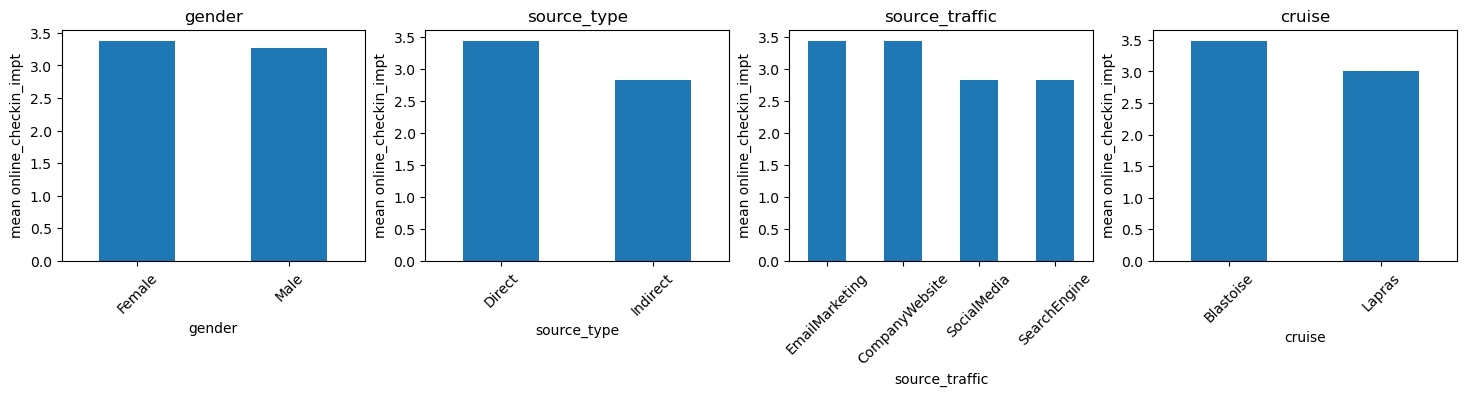

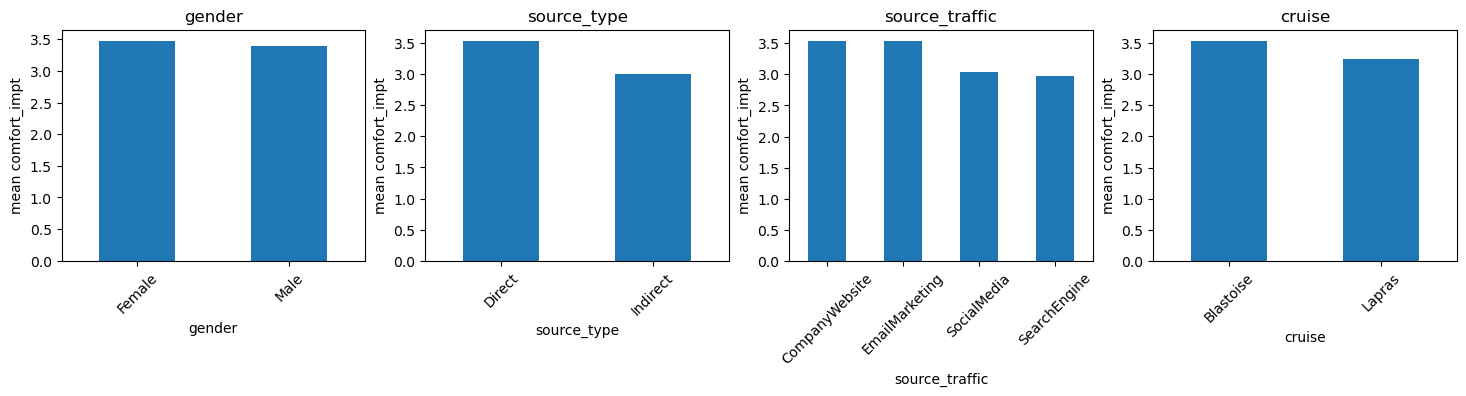

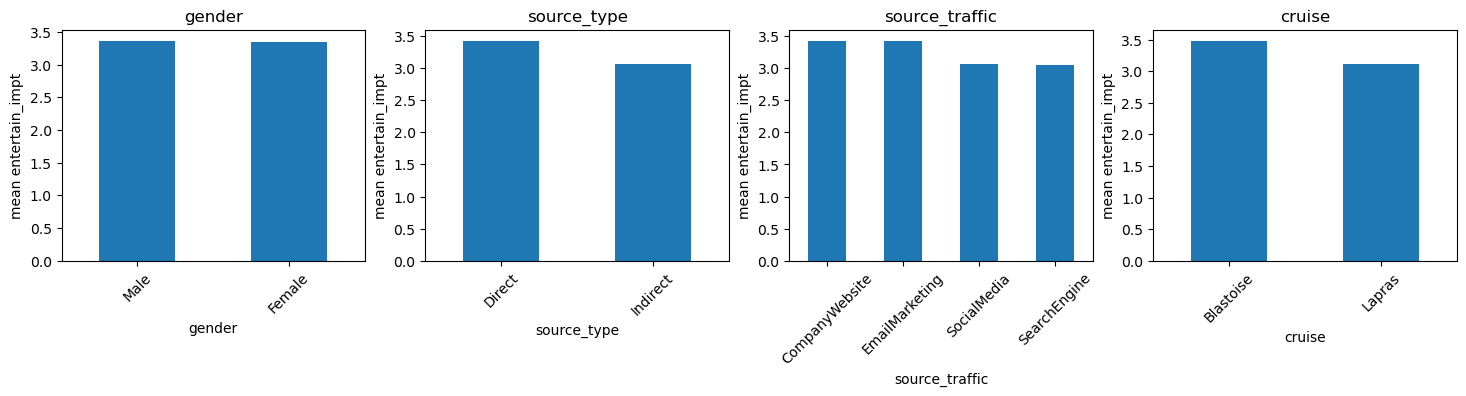

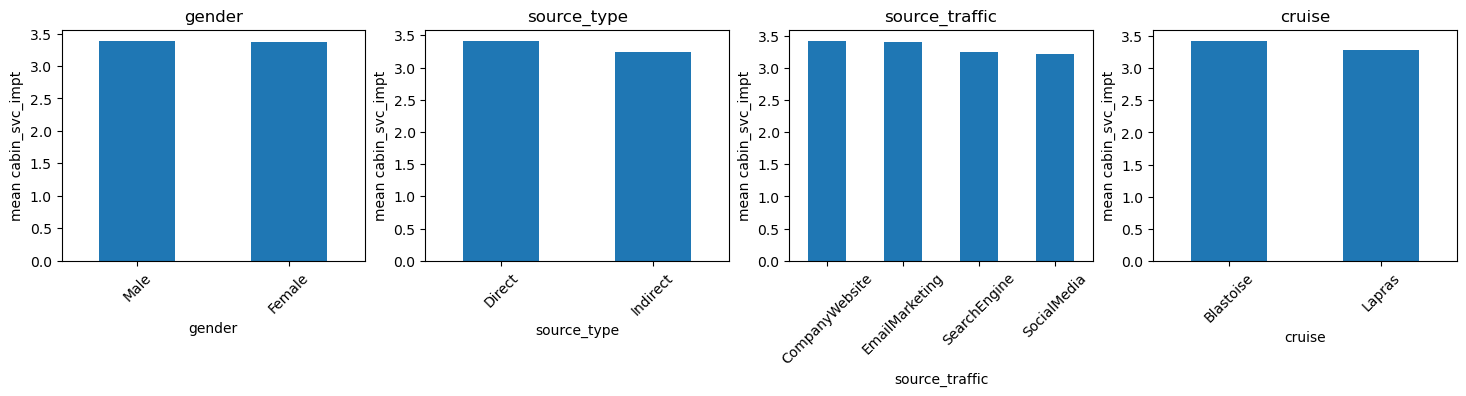

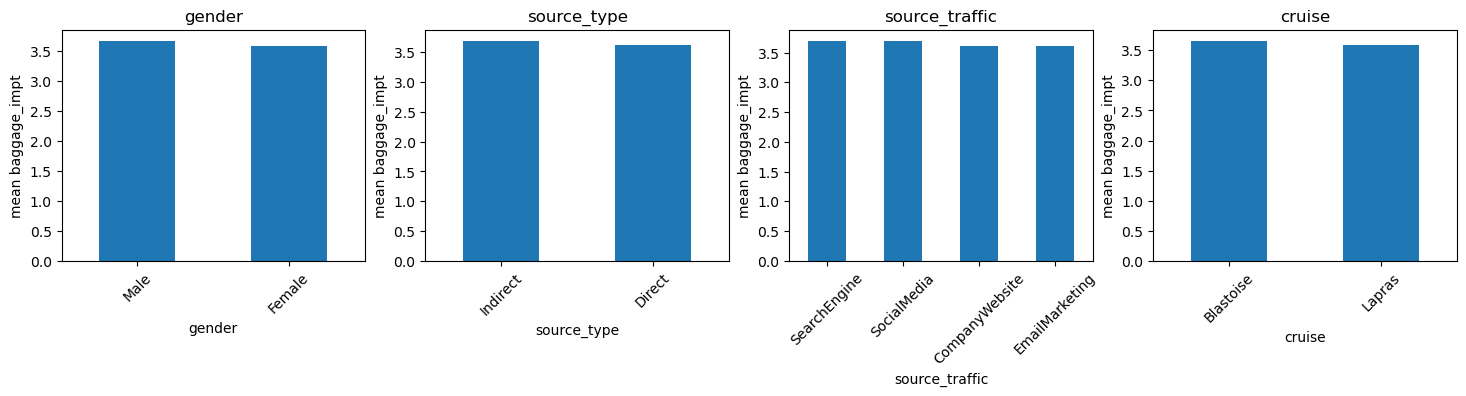

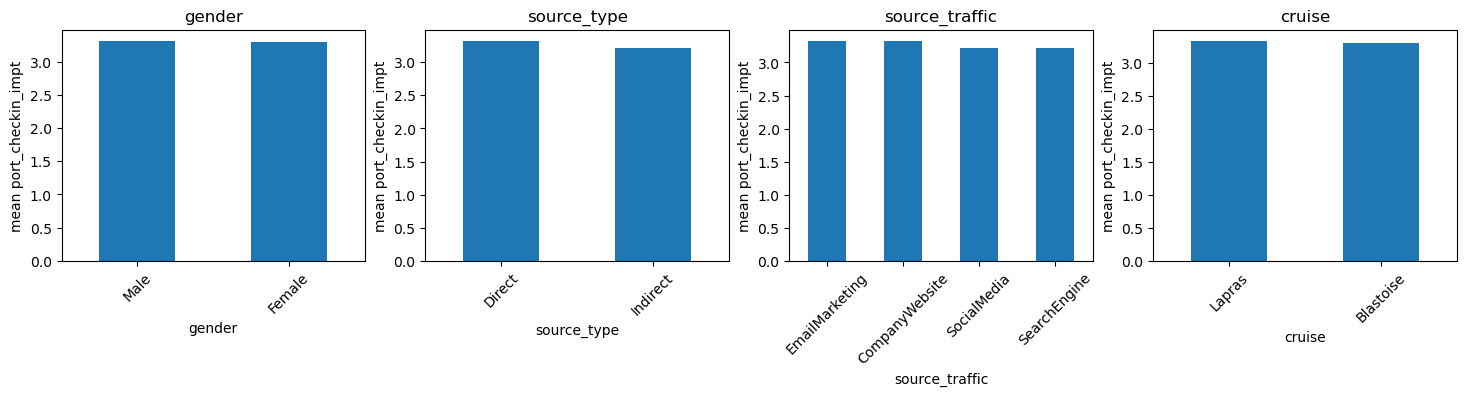

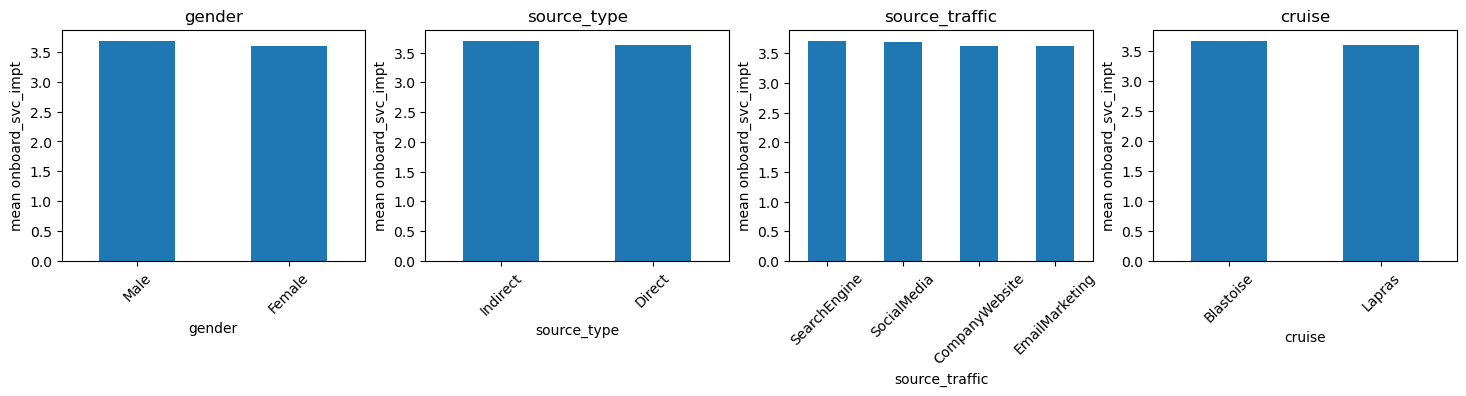

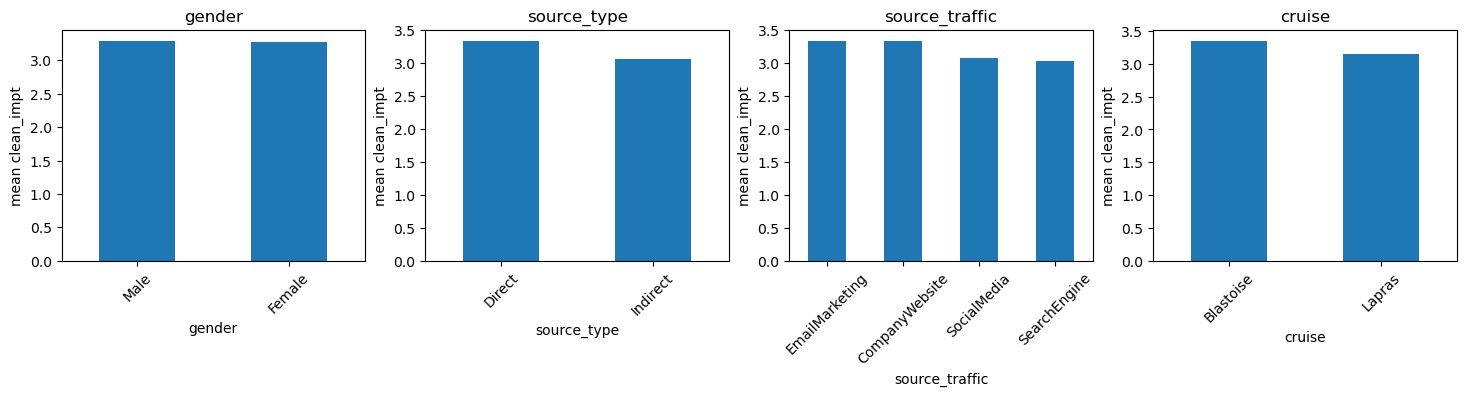

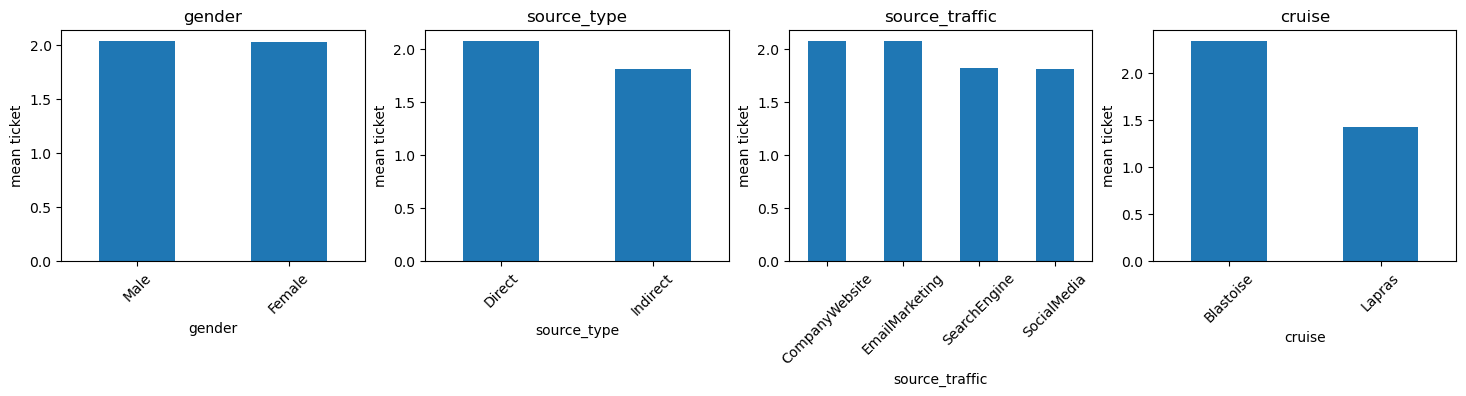

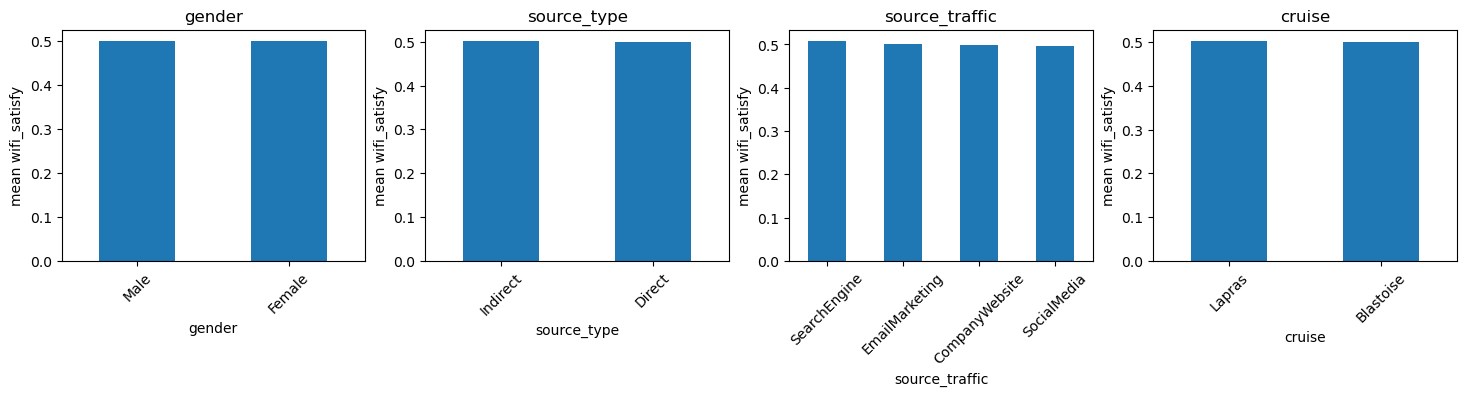

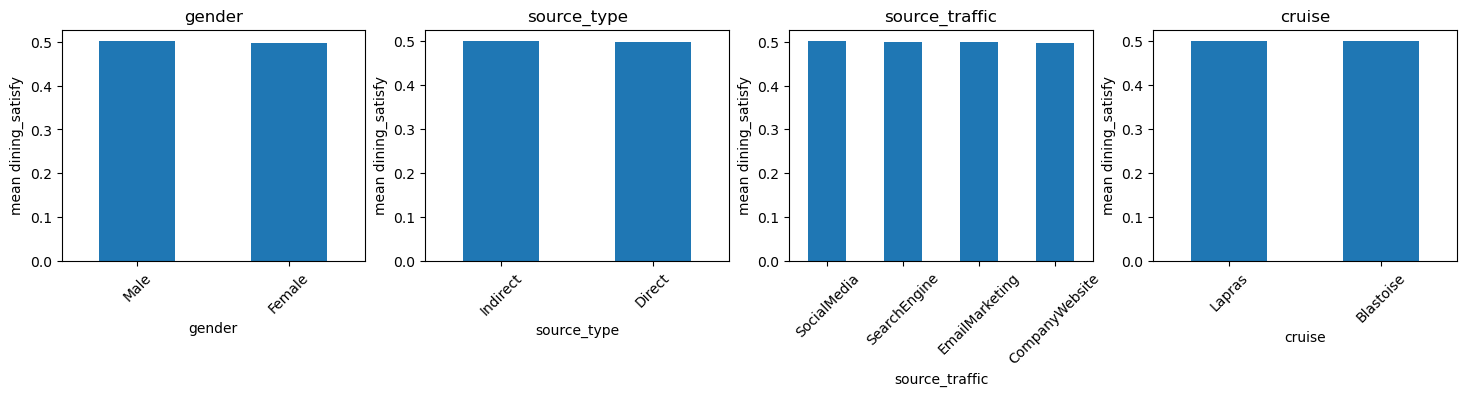

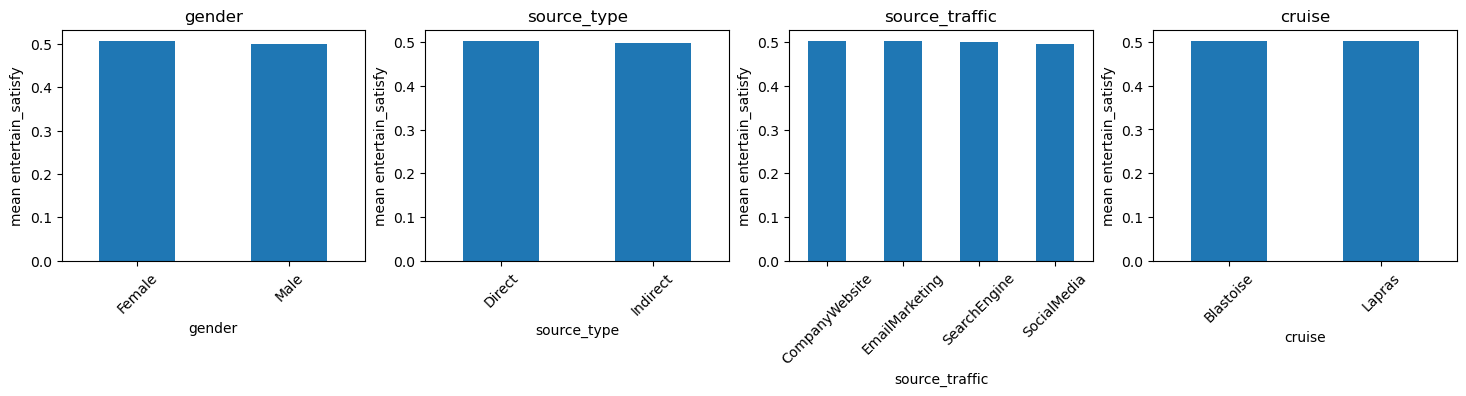

In [35]:
for y in range(len(cruise_cat_ord.columns)):
    fig, axs = plt.subplots(1, len(cruise_cat_nom.columns), figsize=(18, 3))
    for x in range(len(cruise_cat_nom.columns)):    
        
        # Get ordinal and nominal variables
        nom = cruise_cat_nom.columns[x]
        ord = cruise_cat_ord.columns[y]
        data = (cruise[[ord] + [nom]].groupby(nom)[ord].mean()).sort_values(ascending=False)
        
        # Plot bar plot
        data_plot = data.plot.bar(ax=axs[x], title=nom, ylabel="mean " + str(ord))
        data_plot.set_xticklabels(data_plot.get_xticklabels(), rotation=45)
        print()
    plt.show()

Possible correlations

* Passengers on Blastoise valued *wifi_impt*, *booking_impt*, *online_checkin_impt*, *comfort_impt*, *entertain_impt*, *cabin_svc_impt*, *clean_impt* more than passengers on Lapras.
* Passengers on who learnt about / booked the cruise through direct channels (company website / email marketing) valued *schedule_impt*, *online_checkin_impt*, *comfort_impt*, *entertain_impt*, *cabin_svc_impt*, *clean_impt*  more than passengers who learnt about / booked the cruise through indirect channels (social media / search engine).
* Passengers on Lapras valued *schedule_impt* more than passengers on Blastoise.
* Passengers on Blastoise and who learnt about / booked the cruise through direct channels (company website / email marketing) are more likely to buy expensive tickets than passengers on Lapras and passengers who learnt about / booked the cruise through indirect channels (social media / search engine).

## 3.3 Multivariate analysis

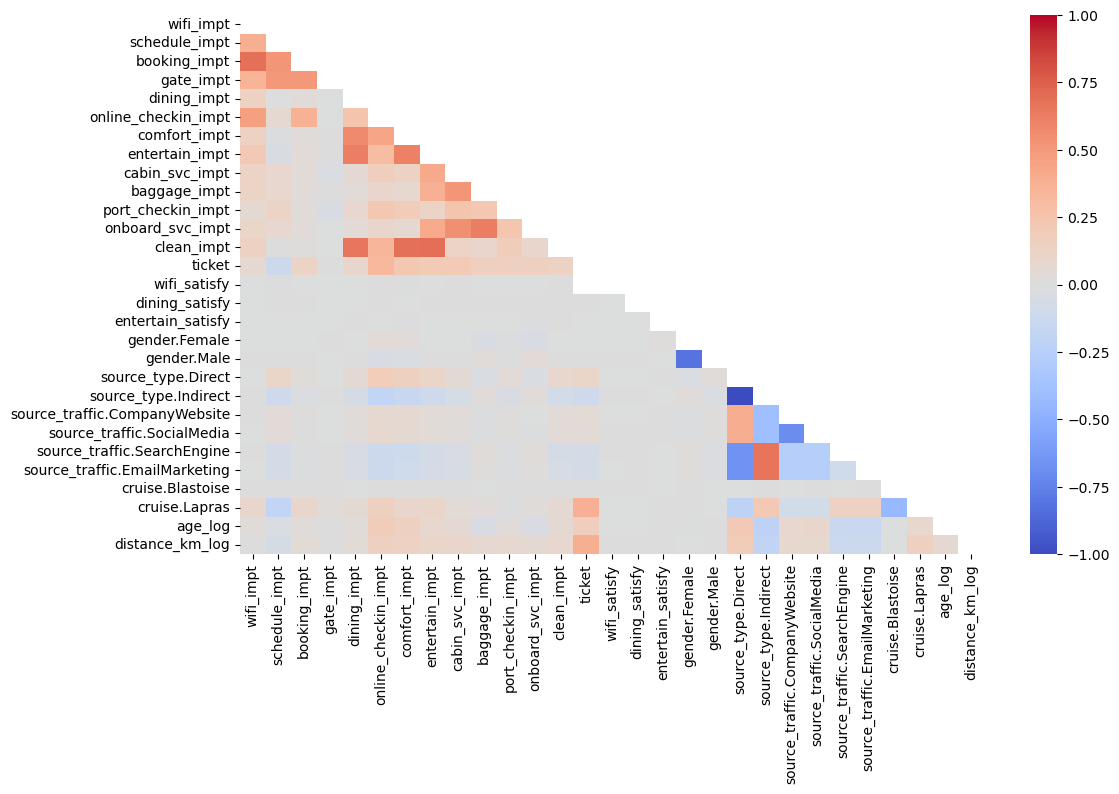

In [36]:
# Drop non-encoded nominal data
cruise = cruise.drop([i for i in cruise_cat_nom.columns],
                    axis="columns")

# Plot correlation matrix
corr_mat = cruise.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(corr_mat, mask=np.triu(corr_mat), vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

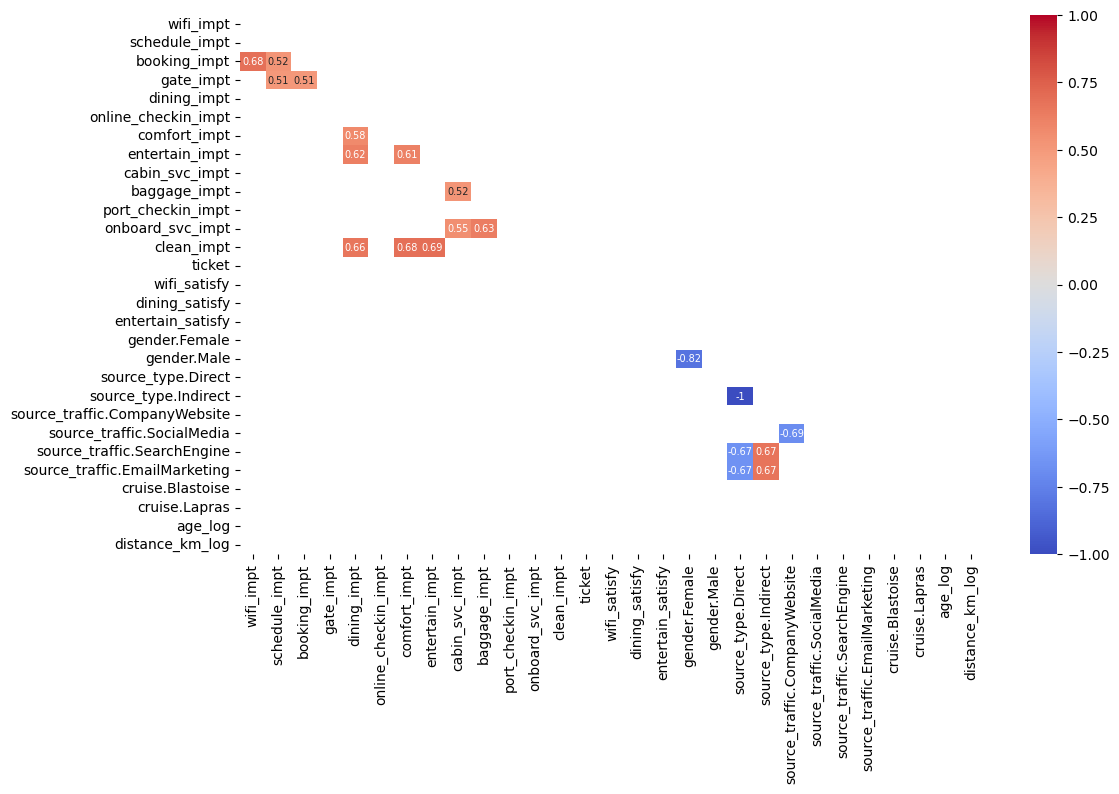

In [37]:
# Filter for higher correlations
corr_mat_filter = corr_mat[((corr_mat >= .5) | (corr_mat <= -.5)) & (corr_mat !=1.000)]
plt.figure(figsize=(12, 7))
sns.heatmap(corr_mat_filter, 
            mask=np.triu(corr_mat_filter),
            annot=True, annot_kws={"size":7}, 
            vmin=-1, vmax=1,
            cmap="coolwarm")
plt.show()

* Passengers who value *booking_impt* also value *wifi_impt*.
* Passengers who value *gate_impt* also value *schedule_impt* and *booking_impt*.
* Passengers who value *comfort_impt* also value *dining_impt*.
* Passengers who value *entertain_impt* also value *dining_impt* and *comfort_impt*.
* Passengers who value *baggage_impt* also value *cabin_svc_impt*.
* Passengers who value *onboard_svc_impt* also value *cabin_svc_impt* and *baggage_impt*.
* Passengers who value *clean_impt* also value *dining_impt*, *comfort_impt*, and *entertain_impt*.

Overall, these variable may be correlated:

* *booking_impt*,  *wifi_impt*, *gate_impt*, *schedule_impt*
* *comfort_impt*, *dining_impt*, *entertain_impt*, *clean_impt*
* *baggage_impt*, *cabin_svc_impt*, *onboard_svc_impt*

# 4. Data imputation

## 4.1. Remove columns 

In [38]:
# Calculate percentage of missing data
(cruise.isnull().sum() / (len(cruise))) * 100

wifi_impt                        14.573739
schedule_impt                    16.223335
booking_impt                     17.463227
gate_impt                        12.816327
dining_impt                      12.584521
online_checkin_impt              13.784367
comfort_impt                     12.596843
entertain_impt                   11.896034
cabin_svc_impt                   10.365037
baggage_impt                     12.627647
port_checkin_impt                10.740085
onboard_svc_impt                 13.674240
clean_impt                       11.181363
ticket                           14.963419
wifi_satisfy                     52.145553
dining_satisfy                    0.353485
entertain_satisfy                44.898729
gender.Female                     0.000000
gender.Male                       0.000000
source_type.Direct                0.000000
source_type.Indirect              0.000000
source_traffic.CompanyWebsite     0.000000
source_traffic.SocialMedia        0.000000
source_traf

Since a significant portion of *wifi_satisfy* and *entertain_satisfy* are missing, these columns will be removed as they may be misleading. 

* ASSUMPTION: These columns are not as important to the prediction as passengers would have already bought the tickets before they do the post-trip survey. Furthermore, as shown in section __3.1.2. Data exploration: Univariate analysis: Categorical (ordinal)__, there are almost equal number of passengers who are satisfied and dissatisfied with the Wifi and Entertainment. 

In [39]:
# Drop missing data columns
cruise = cruise.drop(["wifi_satisfy", "entertain_satisfy"], axis="columns")

## 4.2. Imputation 

As the dataset consists of passengers' response, nothing can be done if the passengers did not respond to the questions. These data are likely missing at random and should be removed. However, removing these data will result in 17112 data points remaining (13% of the original data) and too much information would be lost.

### 4.2.1. Numerical 

From section __3. Data exploration__, there is no evidence that *age_log* and *distance_km_log* are dependent on other variables. Thus, a simple median imputation would be used to fill missing numerical data.

In [40]:
# Fill numerical variables with median
cruise[cruise_num.columns] = cruise_num.fillna(cruise_num.median())

In [41]:
# Calculate percentage of missing data
(cruise.isnull().sum() / (len(cruise))) * 100

wifi_impt                        14.573739
schedule_impt                    16.223335
booking_impt                     17.463227
gate_impt                        12.816327
dining_impt                      12.584521
online_checkin_impt              13.784367
comfort_impt                     12.596843
entertain_impt                   11.896034
cabin_svc_impt                   10.365037
baggage_impt                     12.627647
port_checkin_impt                10.740085
onboard_svc_impt                 13.674240
clean_impt                       11.181363
ticket                           14.963419
dining_satisfy                    0.353485
gender.Female                     0.000000
gender.Male                       0.000000
source_type.Direct                0.000000
source_type.Indirect              0.000000
source_traffic.CompanyWebsite     0.000000
source_traffic.SocialMedia        0.000000
source_traffic.SearchEngine       0.000000
source_traffic.EmailMarketing     0.000000
cruise.Blas

### 4.2.2 Categorical

In [42]:
# Create a function to fillna by group
def fillna_by_group(data, fill_var, group_vars):
    
    # Calculate median values after grouping
    map_dict = data.groupby(group_vars).median()[fill_var].to_dict()
    
    # Get median value
    for i in range(len(data)):
        key_list = []
        for key_var in group_vars:
            key = data.loc[i, key_var]
            key_list.append(key)
        key_tuple = tuple(key_list)

        # Replace NaN with median
        if np.isnan(cruise.loc[i, fill_var]):
            if not np.isnan(key_tuple).all():
                try:
                    data.loc[i, fill_var] = map_dict[key_tuple]
                except:
                    pass
    
    # Fill remaining NaN values with overall median of column
    data[fill_var] = data[fill_var].fillna(data[fill_var].median())
    return data

From section __3.3. Data exploration: Multivariate analysis__, these variables may be correlated and will be taken into consideration to impute missing ordinal categorical variables using median values:

* *booking_impt*, *wifi_impt*, *gate_impt*, *schedule_impt*
* *comfort_impt*, *dining_impt*, *entertain_impt*, *clean_impt*
* *baggage_impt*, *cabin_svc_impt*, *onboard_svc_impt*

In [43]:
# Fill median by groups

# booking_impt, wifi_impt, gate_impt, schedule_impt
cruise = fillna_by_group(cruise, "booking_impt", ["wifi_impt", "gate_impt", "schedule_impt"])
cruise = fillna_by_group(cruise, "wifi_impt", ["booking_impt", "gate_impt", "schedule_impt"])
cruise = fillna_by_group(cruise, "gate_impt", ["booking_impt", "wifi_impt", "schedule_impt"])
cruise = fillna_by_group(cruise, "schedule_impt", ["booking_impt", "wifi_impt", "gate_impt"])

# comfort_impt, dining_impt, entertain_impt, clean_impt
cruise = fillna_by_group(cruise, "comfort_impt", ["dining_impt", "entertain_impt", "clean_impt"])
cruise = fillna_by_group(cruise, "dining_impt", ["comfort_impt", "entertain_impt", "clean_impt"])
cruise = fillna_by_group(cruise, "entertain_impt", ["comfort_impt", "dining_impt", "clean_impt"])
cruise = fillna_by_group(cruise, "clean_impt", ["comfort_impt", "dining_impt", "entertain_impt"])

# baggage_impt, cabin_svc_impt, onboard_svc_impt
cruise = fillna_by_group(cruise, "baggage_impt", ["cabin_svc_impt", "onboard_svc_impt"])
cruise = fillna_by_group(cruise, "cabin_svc_impt", ["baggage_impt", "onboard_svc_impt"])
cruise = fillna_by_group(cruise, "onboard_svc_impt", ["baggage_impt", "cabin_svc_impt"])

In [44]:
# Calculate percentage of missing data
(cruise.isnull().sum() / (len(cruise))) * 100

wifi_impt                         0.000000
schedule_impt                     0.000000
booking_impt                      0.000000
gate_impt                         0.000000
dining_impt                       0.000000
online_checkin_impt              13.784367
comfort_impt                      0.000000
entertain_impt                    0.000000
cabin_svc_impt                    0.000000
baggage_impt                      0.000000
port_checkin_impt                10.740085
onboard_svc_impt                  0.000000
clean_impt                        0.000000
ticket                           14.963419
dining_satisfy                    0.353485
gender.Female                     0.000000
gender.Male                       0.000000
source_type.Direct                0.000000
source_type.Indirect              0.000000
source_traffic.CompanyWebsite     0.000000
source_traffic.SocialMedia        0.000000
source_traffic.SearchEngine       0.000000
source_traffic.EmailMarketing     0.000000
cruise.Blas

From the observations in section __3.2. Data exploration: Bivariate analysis__, it can be inferred that these variables may be correlated with each other and will be taken into consideration to impute the remaining missing ordinal categorical variables using median values:            

* *cruise.Blastoise*, *source_type.Direct*, *source_traffic.CompanyWebsite*, *source_traffic.EmailMarketing*, *online_checkin_impt*, *ticket*

In [45]:
# Fill median by groups
cruise = fillna_by_group(cruise, "online_checkin_impt", ["cruise.Blastoise",
                                                         "source_type.Direct", 
                                                         "source_traffic.CompanyWebsite", 
                                                         "source_traffic.EmailMarketing",
                                                         "ticket"])
cruise = fillna_by_group(cruise, "ticket", ["cruise.Blastoise",
                                            "source_type.Direct", 
                                            "source_traffic.CompanyWebsite", 
                                            "source_traffic.EmailMarketing",
                                            "online_checkin_impt"])

In [46]:
# Calculate percentage of missing data
(cruise.isnull().sum() / (len(cruise))) * 100

wifi_impt                         0.000000
schedule_impt                     0.000000
booking_impt                      0.000000
gate_impt                         0.000000
dining_impt                       0.000000
online_checkin_impt               0.000000
comfort_impt                      0.000000
entertain_impt                    0.000000
cabin_svc_impt                    0.000000
baggage_impt                      0.000000
port_checkin_impt                10.740085
onboard_svc_impt                  0.000000
clean_impt                        0.000000
ticket                            0.000000
dining_satisfy                    0.353485
gender.Female                     0.000000
gender.Male                       0.000000
source_type.Direct                0.000000
source_type.Indirect              0.000000
source_traffic.CompanyWebsite     0.000000
source_traffic.SocialMedia        0.000000
source_traffic.SearchEngine       0.000000
source_traffic.EmailMarketing     0.000000
cruise.Blas

For remaining variables that does not seem to be correlated to any other variables, a simple median imputation would be used to fill missing ordinal categorical variables.

In [47]:
# Fill median
cruise["port_checkin_impt"] = cruise["port_checkin_impt"].fillna(cruise["port_checkin_impt"].median())
cruise["dining_satisfy"] = cruise["dining_satisfy"].fillna(cruise["dining_satisfy"].median()) 

In [48]:
# Calculate percentage of missing data
(cruise.isnull().sum() / (len(cruise))) * 100

wifi_impt                        0.0
schedule_impt                    0.0
booking_impt                     0.0
gate_impt                        0.0
dining_impt                      0.0
online_checkin_impt              0.0
comfort_impt                     0.0
entertain_impt                   0.0
cabin_svc_impt                   0.0
baggage_impt                     0.0
port_checkin_impt                0.0
onboard_svc_impt                 0.0
clean_impt                       0.0
ticket                           0.0
dining_satisfy                   0.0
gender.Female                    0.0
gender.Male                      0.0
source_type.Direct               0.0
source_type.Indirect             0.0
source_traffic.CompanyWebsite    0.0
source_traffic.SocialMedia       0.0
source_traffic.SearchEngine      0.0
source_traffic.EmailMarketing    0.0
cruise.Blastoise                 0.0
cruise.Lapras                    0.0
age_log                          0.0
distance_km_log                  0.0
d

Missing data in nominal categorical variables has already been handled by the one-hot encoding process in section __2.3. Data cleaning: Feature engineering__.

In [49]:
cruise

,wifi_impt,schedule_impt,booking_impt,gate_impt,dining_impt,online_checkin_impt,comfort_impt,entertain_impt,cabin_svc_impt,baggage_impt,...,source_type.Direct,source_type.Indirect,source_traffic.CompanyWebsite,source_traffic.SocialMedia,source_traffic.SearchEngine,source_traffic.EmailMarketing,cruise.Blastoise,cruise.Lapras,age_log,distance_km_log
0,2.0,3.0,5.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.912023,8.179480
1,1.0,4.0,1.0,3.0,4.0,2.0,4.0,4.0,2.0,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.912023,6.510258
2,3.0,3.0,3.0,5.0,3.0,2.0,5.0,5.0,2.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.218876,7.062192
3,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.970292,5.634790
4,3.0,4.0,2.0,3.0,1.0,2.0,1.0,1.0,3.0,3.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.143135,7.518773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129845,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.583519,6.770789
129846,2.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.555348,5.480639
129847,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.397895,7.574045
129848,2.0,1.0,1.0,4.0,4.0,2.0,4.0,4.0,5.0,4.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.397895,7.317212
